In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [28]:
def read_datafile(filename):
    df = pd.read_csv(filename,delimiter='\s+')
    X = df.values
    return X

In [29]:
X = read_datafile('blobs.txt')
X

array([[-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       [-8.93021, -4.15571],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

In [31]:
#MBSAS Implementation

def euclidian(a,b):
    return np.sqrt(np.sum((a-b)**2,axis=0))

def MinMax(X):
    np.random.shuffle(X)

    m = 1
    clusters = [[X[0],1]]
    threshold = 10

    N = len(X)
    W = [X[0]]
    X_W = list(X[1:])

    # cluster formation

    while(True):
        dists = []

        for i,x in enumerate(X_W):
            min_val = 2e10
            curr = -1
            for z in W:
                min_val = min(min_val,euclidian(x,z))
            dists.append((min_val,i))

        dy,y = max(dists)

        if dy>threshold:
            W.append(X_W[y])
            X_W.pop(y)

        else:
            break

    cluster_wise_data = []

    for each in W:
        cluster_wise_data.append([])

    for i in range(0,N):
        min_val = 2e10
        curr = -1
        for k,centroid in enumerate(W):
            dist = euclidian(X[i],centroid)
            if min_val > dist:
                min_val = dist
                curr = k
        cluster_wise_data[curr].append(X[i])

    return cluster_wise_data            

cluster_wise_data = MinMax(X)

In [32]:
def plot(clusters):
    for k in range(len(cluster_wise_data)):
        rgb = (random.random(), random.random(), random.random())
        for each in clusters[k]:
            plt.scatter(each[0],each[1],c=[rgb])

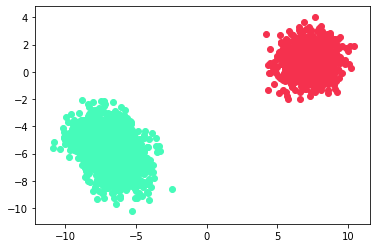

In [33]:
plot(cluster_wise_data)